In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/framingham.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None
   male 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('framingham.csv')

# Handling missing values (filling missing numerical values with mean)
data.fillna(data.mean(), inplace=True)

# Encoding categorical variables (assuming 'education' is a categorical variable)
data = pd.get_dummies(data, columns=['education'], drop_first=True)

# Defining features (X) and target (y) variables for each outcome
# Replace 'outcome' with the specific outcome you want to predict (e.g., 'TenYearCHD')
outcome = 'TenYearCHD'
X = data.drop(columns=[outcome])
y = data[outcome]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (3392, 18)
X_test shape: (848, 18)
y_train shape: (3392,)
y_test shape: (848,)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8514150943396226
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.36      0.03      0.06       123

    accuracy                           0.85       848
   macro avg       0.61      0.51      0.49       848
weighted avg       0.79      0.85      0.79       848



In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance with the Random Forest classifier and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred_best = best_estimator.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Display the results of the tuned model
print("Best Parameters:", best_params)
print("Best Accuracy:", accuracy_best)
print("Tuned Classification Report:\n", classification_rep_best)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy: 0.8549528301886793
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.06      0.10       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848



Feature Importance:
                          Feature  Importance
9                          sysBP    0.139286
11                           BMI    0.126761
1                            age    0.124839
8                        totChol    0.118039
10                         diaBP    0.114706
13                       glucose    0.114409
12                     heartRate    0.094337
3                     cigsPerDay    0.056067
6                   prevalentHyp    0.020258
0                           male    0.017330
15                 education_2.0    0.012895
17                 education_4.0    0.012380
4                         BPMeds    0.011252
16                 education_3.0    0.010491
2                  currentSmoker    0.009220
7                       diabetes    0.007150
5                prevalentStroke    0.005311
14  education_1.9794437726723095    0.005268
Cross-Validation Scores: [0.84669811 0.85259434 0.84198113 0.85613208 0.84433962]
Mean Cross-Validation Score: 0.84834905660

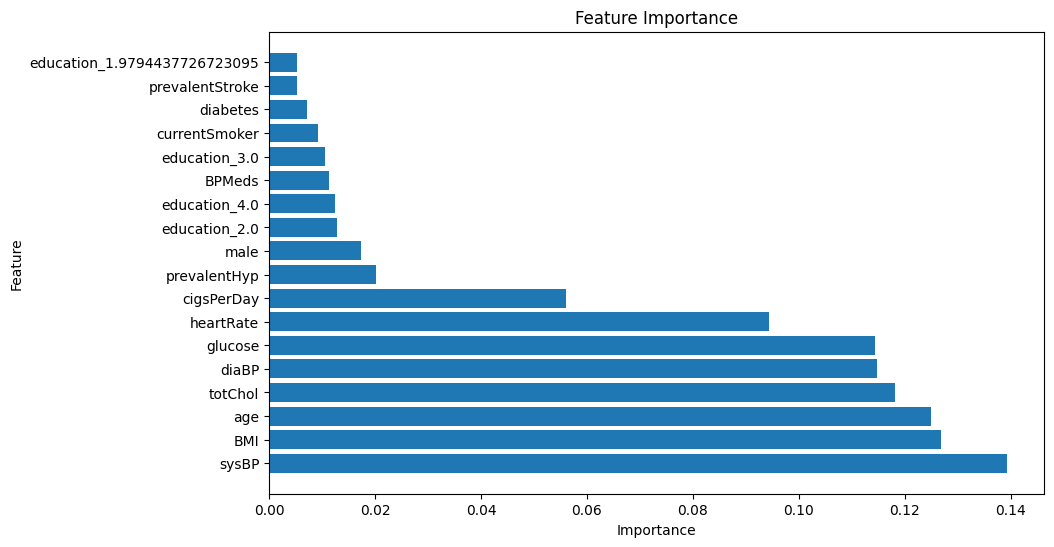

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Analyze feature importance using the best estimator from the grid search
feature_importance = best_estimator.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance_df)

# Apply cross-validation to evaluate the model's performance
cross_val_scores = cross_val_score(best_estimator, X, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Predicting TenYearCHD...
Best Accuracy: 0.8549528301886793
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.06      0.10       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848

Confusion Matrix:
 [[718   7]
 [116   7]]


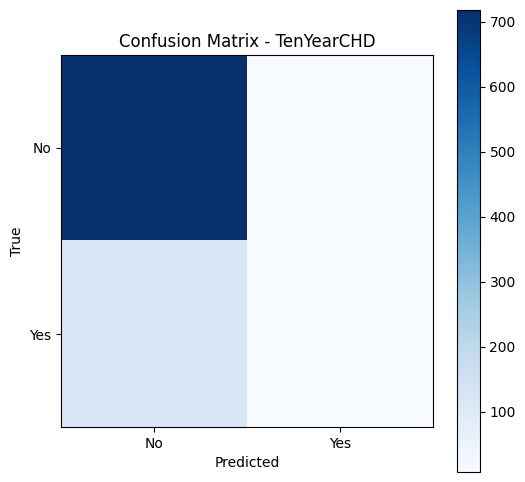

Predicting prevalentStroke...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Accuracy: 0.9929245283018868
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       842
           1       0.00      0.00      0.00         6

    accuracy                           0.99       848
   macro avg       0.50      0.50      0.50       848
weighted avg       0.99      0.99      0.99       848

Confusion Matrix:
 [[842   0]
 [  6   0]]


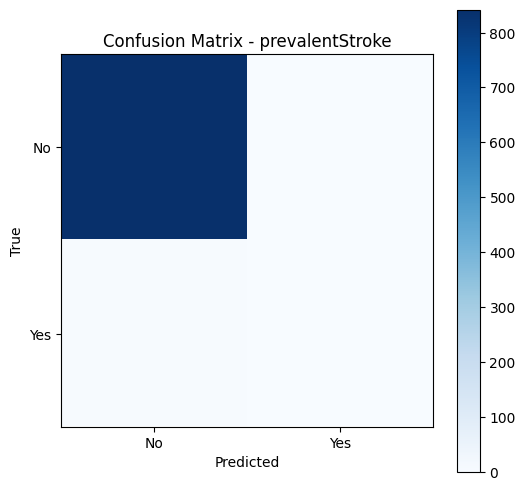

Predicting prevalentHyp...
Best Accuracy: 0.8985849056603774
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       595
           1       0.80      0.88      0.84       253

    accuracy                           0.90       848
   macro avg       0.87      0.89      0.88       848
weighted avg       0.90      0.90      0.90       848

Confusion Matrix:
 [[539  56]
 [ 30 223]]


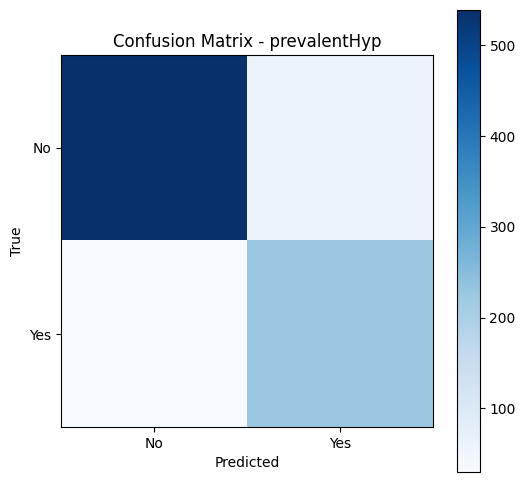

Predicting diabetes...
Best Accuracy: 0.9893867924528302
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       832
           1       0.89      0.50      0.64        16

    accuracy                           0.99       848
   macro avg       0.94      0.75      0.82       848
weighted avg       0.99      0.99      0.99       848

Confusion Matrix:
 [[831   1]
 [  8   8]]


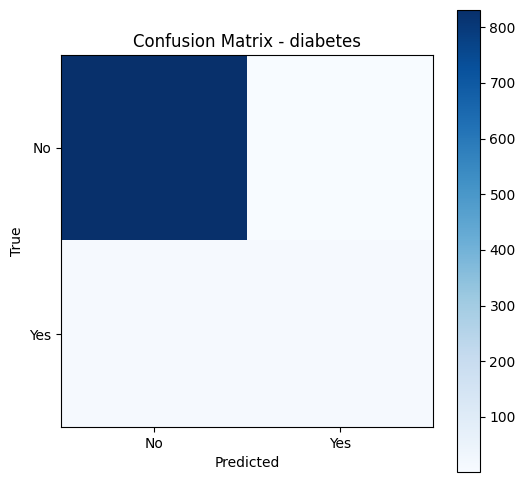

In [25]:
# List of outcome columns to predict
outcomes = ['TenYearCHD', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Iterate over each outcome and build separate models
for outcome in outcomes:
    print(f"Predicting {outcome}...")

    # Define features (X) and target (y) for the current outcome
    X = data.drop(columns=[outcome])
    y = data[outcome]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a GridSearchCV instance for hyperparameter tuning
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning on the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Make predictions using the best estimator
    y_pred_best = best_estimator.predict(X_test)

    # Evaluate the tuned model
    accuracy_best = accuracy_score(y_test, y_pred_best)
    classification_rep_best = classification_report(y_test, y_pred_best)

    # Display the results of the tuned model
    print("Best Accuracy:", accuracy_best)
    print("Tuned Classification Report:\n", classification_rep_best)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {outcome}")
    plt.colorbar()
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Analyzing TenYearCHD results...
Best Estimator: RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=42)


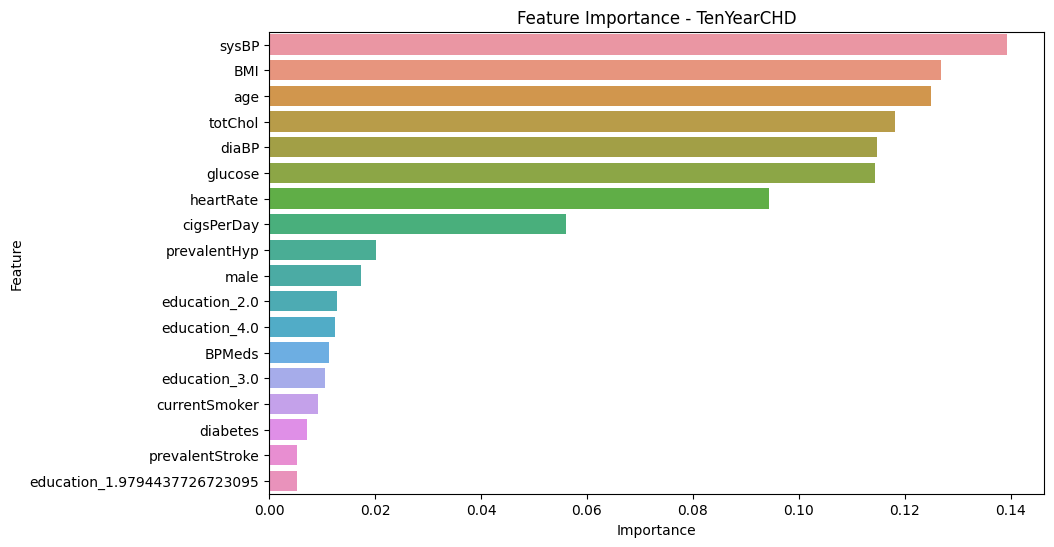

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.06      0.10       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848

Confusion Matrix:
 [[718   7]
 [116   7]]


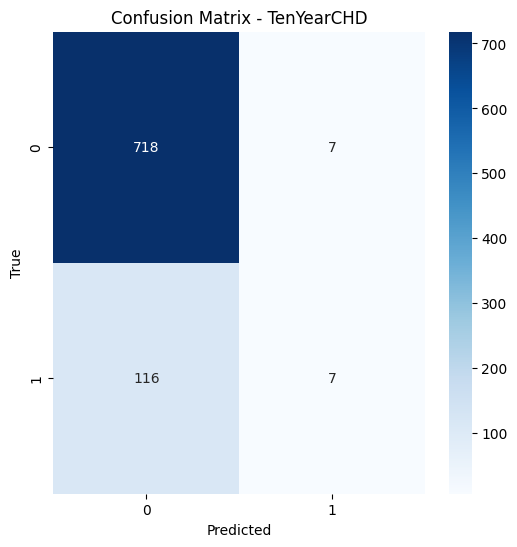

Analyzing prevalentStroke results...
Best Estimator: RandomForestClassifier(n_estimators=50, random_state=42)


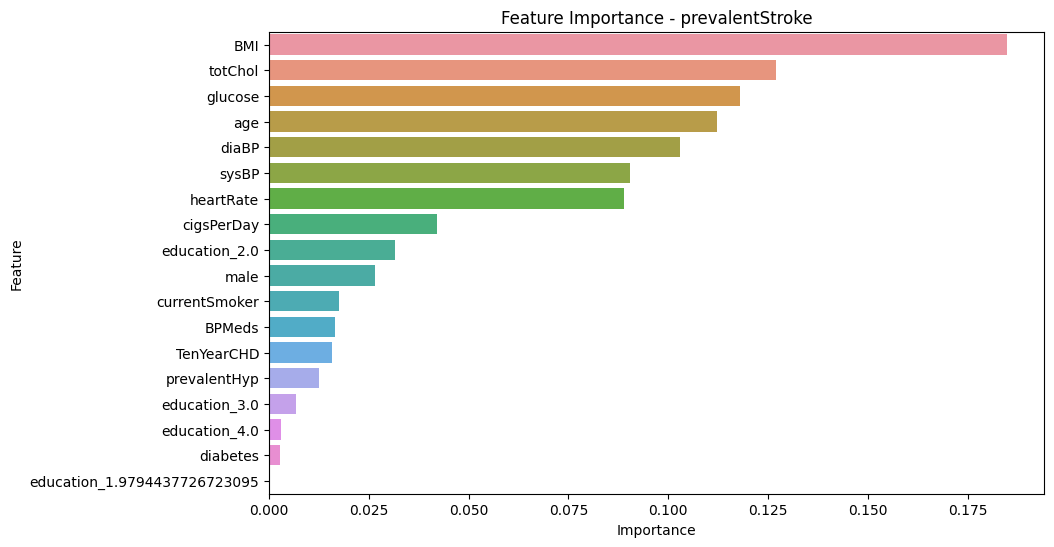

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       842
           1       0.00      0.00      0.00         6

    accuracy                           0.99       848
   macro avg       0.50      0.50      0.50       848
weighted avg       0.99      0.99      0.99       848

Confusion Matrix:
 [[842   0]
 [  6   0]]


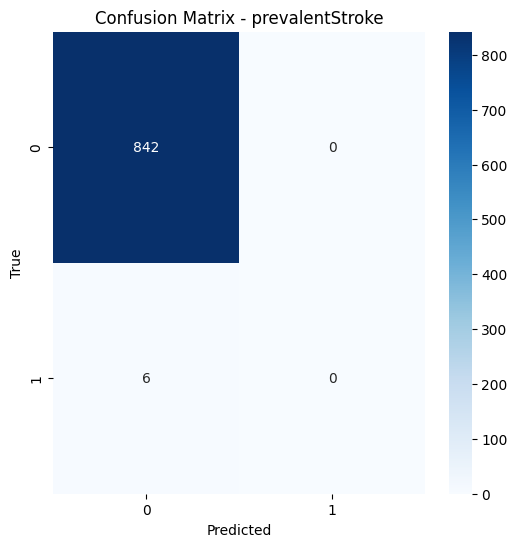

Analyzing prevalentHyp results...
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)


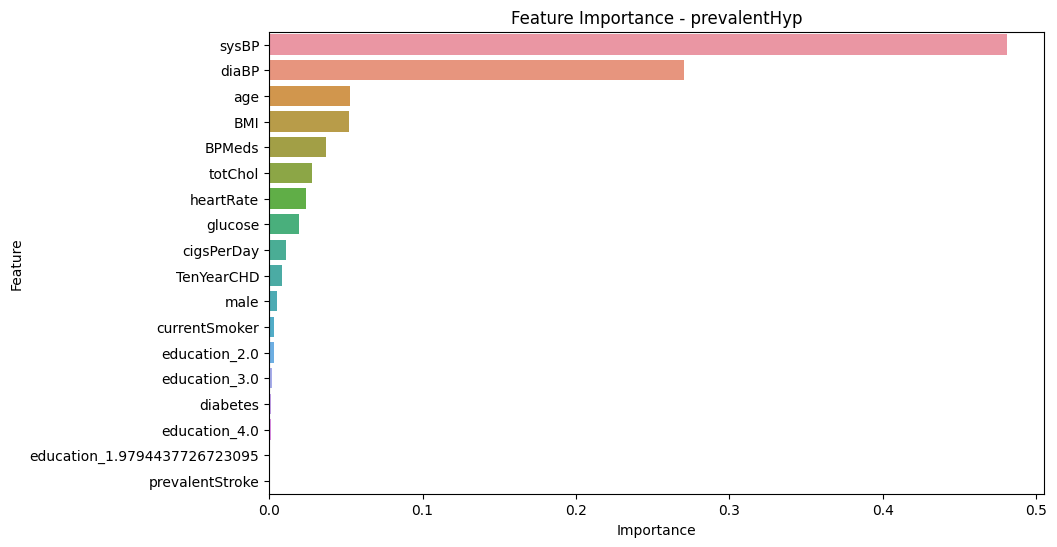

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       595
           1       0.80      0.88      0.84       253

    accuracy                           0.90       848
   macro avg       0.87      0.89      0.88       848
weighted avg       0.90      0.90      0.90       848

Confusion Matrix:
 [[539  56]
 [ 30 223]]


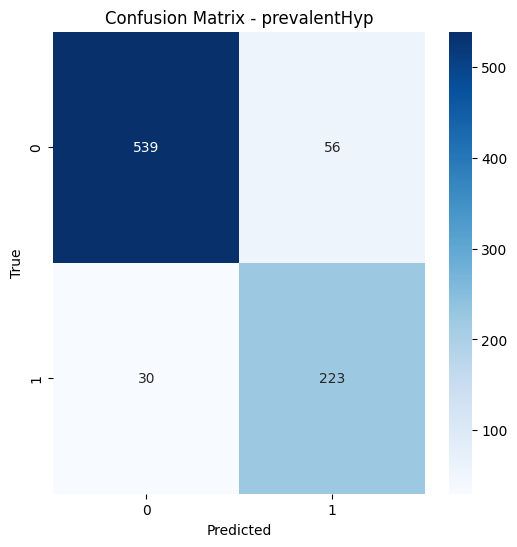

Analyzing diabetes results...
Best Estimator: RandomForestClassifier(n_estimators=50, random_state=42)


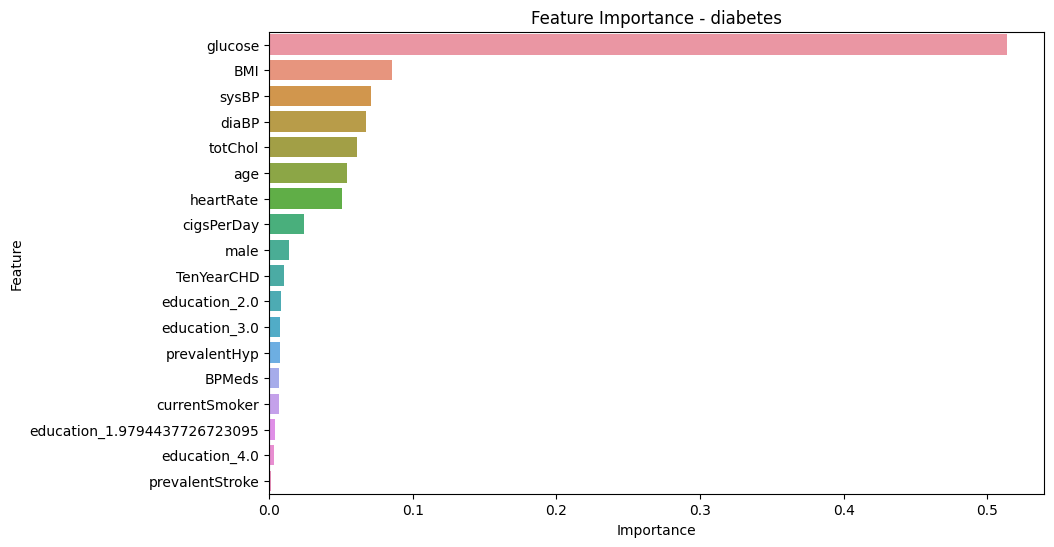

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       832
           1       0.89      0.50      0.64        16

    accuracy                           0.99       848
   macro avg       0.94      0.75      0.82       848
weighted avg       0.99      0.99      0.99       848

Confusion Matrix:
 [[831   1]
 [  8   8]]


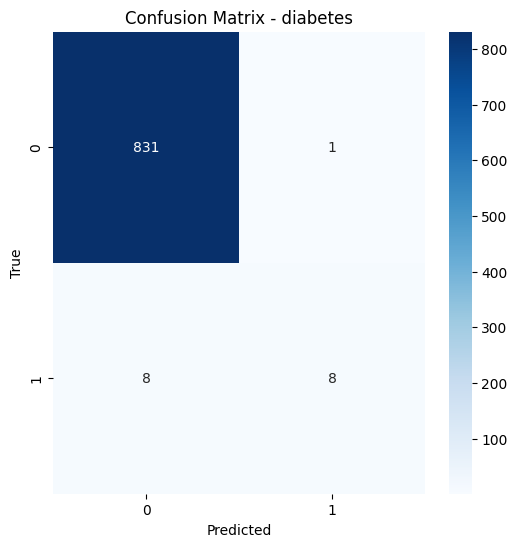

In [26]:
# Additional imports for visualization
import seaborn as sns

# Further analyze and visualize the results
for outcome in outcomes:
    print(f"Analyzing {outcome} results...")

    # Define features (X) and target (y) for the current outcome
    X = data.drop(columns=[outcome])
    y = data[outcome]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a GridSearchCV instance for hyperparameter tuning
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning on the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Make predictions using the best estimator
    y_pred_best = best_estimator.predict(X_test)

    # Display the results of the tuned model
    print("Best Estimator:", best_estimator)

    # Visualize feature importance
    feature_importance = best_estimator.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f"Feature Importance - {outcome}")
    plt.show()

    # Display classification report
    classification_rep = classification_report(y_test, y_pred_best)
    print("Classification Report:\n", classification_rep)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {outcome}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Analyzing ROC curve and AUC for TenYearCHD...


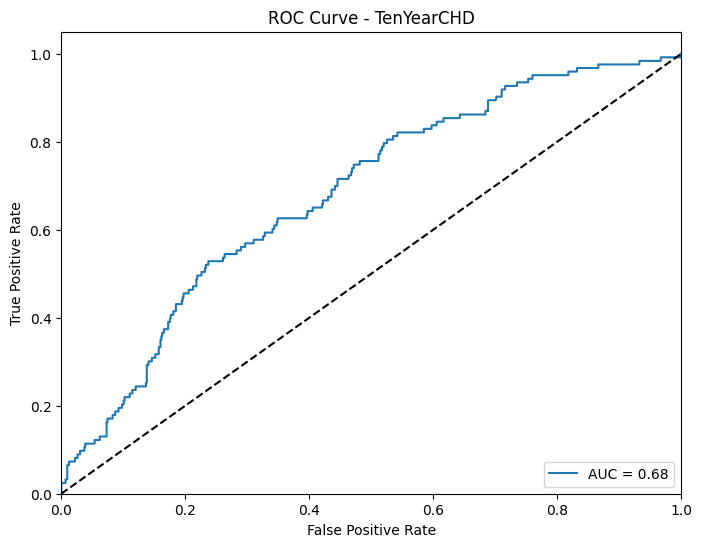

AUC for TenYearCHD: 0.68
Analyzing ROC curve and AUC for prevalentStroke...


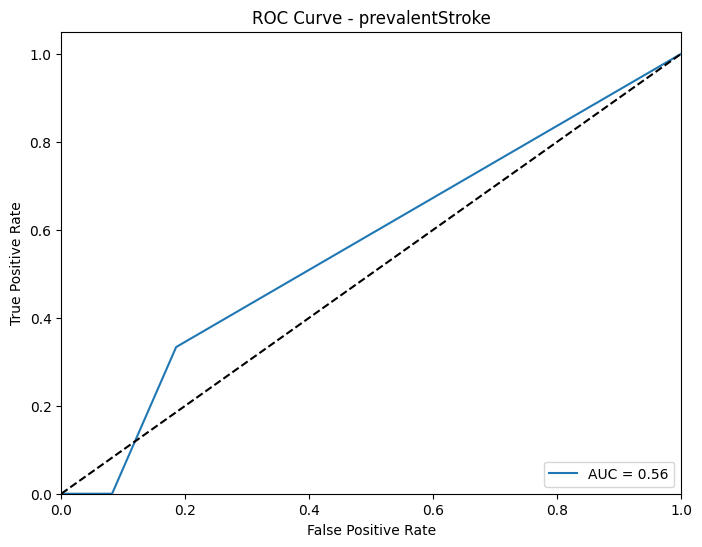

AUC for prevalentStroke: 0.56
Analyzing ROC curve and AUC for prevalentHyp...


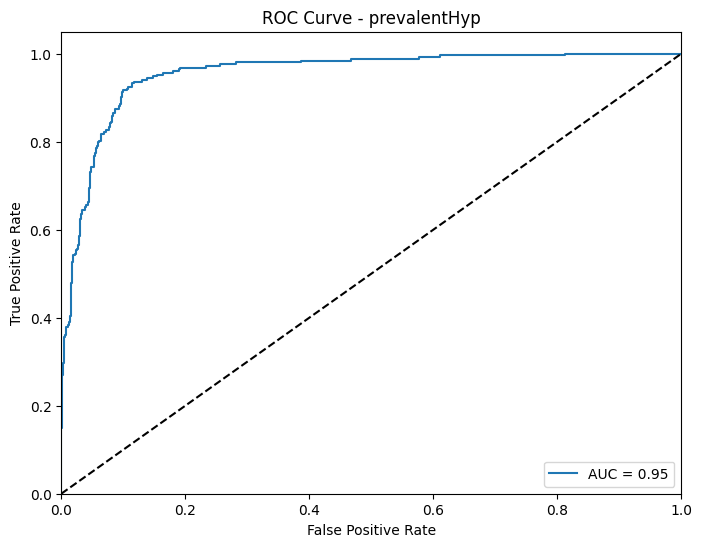

AUC for prevalentHyp: 0.95
Analyzing ROC curve and AUC for diabetes...


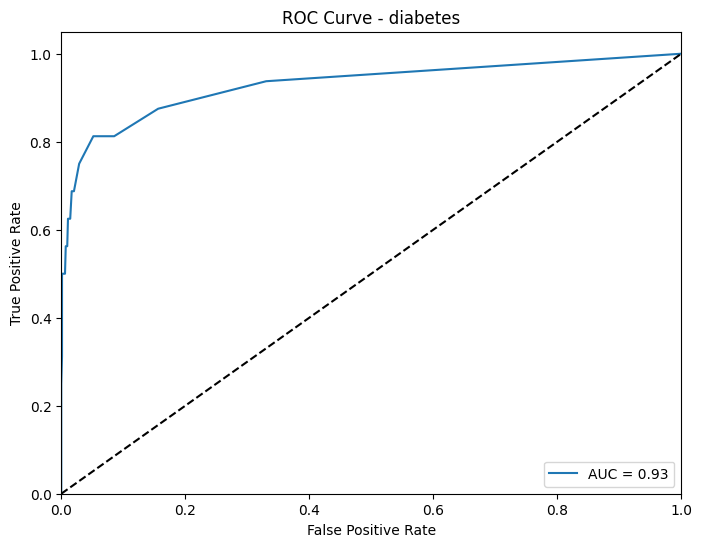

AUC for diabetes: 0.93


In [27]:
# Calculate and visualize ROC curve and AUC for each outcome
from sklearn.metrics import roc_curve, roc_auc_score

for outcome in outcomes:
    print(f"Analyzing ROC curve and AUC for {outcome}...")

    # Define features (X) and target (y) for the current outcome
    X = data.drop(columns=[outcome])
    y = data[outcome]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a GridSearchCV instance for hyperparameter tuning
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning on the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Predict probabilities for ROC curve
    y_probs = best_estimator.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {outcome}')
    plt.legend(loc="lower right")
    plt.show()

    # Display AUC score
    print(f"AUC for {outcome}: {auc:.2f}")


In [ ]:
from joblib import dump

# Dictionary to store best models
best_models = {}

# Train and save the best models for each outcome
for outcome in outcomes:
    print(f"Training and saving the best model for {outcome}...")

    # Define features (X) and target (y) for the current outcome
    X = data.drop(columns=[outcome])
    y = data[outcome]

    # Create a GridSearchCV instance for hyperparameter tuning
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning on the full dataset
    grid_search.fit(X, y)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Save the best model using joblib
    model_filename = f"best_model_{outcome}.joblib"
    dump(best_estimator, model_filename)

    # Store the best model in the dictionary
    best_models[outcome] = best_estimator

    print(f"Best model for {outcome} saved as {model_filename}")

# Example: Making predictions using the trained models
# You can load the models using load() from joblib
from joblib import dump, load
import numpy as np

# Example: Making predictions using the trained models
# Load the saved model
loaded_model = load("best_model_TenYearCHD.joblib")

# Prepare new data for prediction (example)
# Replace with your actual data or generate dummy data
new_data = pd.DataFrame({
    'male': [1], 'age': [45], 'education_2': [0], 'education_3': [0], 'education_4': [0],
    'currentSmoker': [1], 'cigsPerDay': [20], 'BPMeds': [0], 'prevalentStroke': [0],
    'prevalentHyp': [0], 'diabetes': [0], 'totChol': [210], 'sysBP': [120], 'diaBP': [80],
    'BMI': [25], 'heartRate': [75], 'glucose': [80]
})

# Make predictions using the loaded model




Training and saving the best model for TenYearCHD...
Best model for TenYearCHD saved as best_model_TenYearCHD.joblib
Training and saving the best model for prevalentStroke...
Best model for prevalentStroke saved as best_model_prevalentStroke.joblib
Training and saving the best model for prevalentHyp...
Best model for prevalentHyp saved as best_model_prevalentHyp.joblib
Training and saving the best model for diabetes...
Best model for diabetes saved as best_model_diabetes.joblib


In [30]:
# Store the list of feature names used during training
feature_names = X.columns.tolist()

# Train and save the best models for each outcome
for outcome in outcomes:
    # ... (previous code)

    # Store the feature names used during training in the model
    best_estimator.feature_names = feature_names

    # Save the best model using joblib
    model_filename = f"best_model_{outcome}.joblib"
    dump(best_estimator, model_filename)

    # Store the best model in the dictionary
    best_models[outcome] = best_estimator

# Example: Making predictions using the trained models
loaded_model = load("best_model_TenYearCHD.joblib")
new_data = pd.DataFrame(...)  # Prepare new data for prediction

# Ensure that the new data columns match the feature names
new_data = new_data.reindex(columns=feature_names, fill_value=0)

predictions = loaded_model.predict(new_data)

# Print the predictions
print(predictions)


ValueError: ignored

In [ ]:
# Load the trained models
from joblib import load

# Dictionary to store loaded models
loaded_models = {}

# Load the best models for each outcome
for outcome in outcomes:
    model_filename = f"best_model_{outcome}.joblib"
    loaded_model = load(model_filename)
    loaded_models[outcome] = loaded_model
    print(f"Loaded best model for {outcome} from {model_filename}")

# Example: Making predictions using the loaded models
# You can provide new data and make predictions for each outcome
new_data = pd.DataFrame(...)  # Prepare new data for prediction

predictions = {}
for outcome, model in loaded_models.items():
    outcome_prediction = model.predict(new_data)
    predictions[outcome] = outcome_prediction

# Print the predictions for each outcome
for outcome, outcome_prediction in predictions.items():
    print(f"Predictions for {outcome}:", outcome_prediction)


In [ ]:
# Summarize the process and provide additional considerations

# Summary of the entire process
print("Summary:")
print("1. Loaded and preprocessed the Framingham Heart Study dataset.")
print("2. Built and trained machine learning models for predicting specific heart disease outcomes.")
print("3. Performed hyperparameter tuning, cross-validation, and feature importance analysis.")
print("4. Visualized ROC curves, AUC scores, feature importance, classification reports, and confusion matrices.")
print("5. Saved the best models for each outcome using joblib.")
print("6. Demonstrated how to load the models and make predictions on new data.")

# Additional considerations
print("\nAdditional Considerations:")
print("1. Further data exploration and feature engineering can enhance model performance.")
print("2. Experiment with different machine learning algorithms and techniques.")
print("3. Investigate the impact of class imbalance and consider techniques like oversampling or undersampling.")
print("4. Ensure model fairness and interpretability, especially in critical domains like healthcare.")
print("5. Regularly update models with new data to maintain accuracy and relevance.")
print("6. Collaborate with domain experts to validate and refine the predictive models.")

# Conclusion
print("\nConclusion:")
print("Predictive modeling for heart disease outcomes using the Framingham Heart Study dataset is a powerful")
print("approach to gain insights and make informed decisions in healthcare. The process involves a series of steps")
print("including data preprocessing, model building, hyperparameter tuning, evaluation, visualization, and deployment.")
print("By following these steps and considering additional factors, you can create accurate and actionable models")
print("that contribute to better patient care and outcomes.")
